# Laboratorio 2 

Problema 1. Desarrolle una función que dada una imagen en escala de grises muestre dicha imagen en 3 dimensiones, donde los ejes X e Y representan el dominio espacial de la imagen y Z representa la intensidad del color gris de cada pixel.

In [37]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

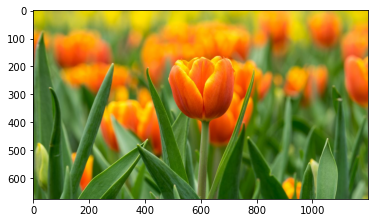

In [39]:
tulipanes=cv2.imread("tulipanes.jpg")
tulipanes=cv2.cvtColor(tulipanes,cv2.COLOR_BGR2RGB)
plt.imshow(tulipanes)
plt.show()

In [16]:
def tres_dimensiones(grayscale_image):
    height, width = grayscale_image.shape
    
    #Coordenadas de x y
    x = np.arange(0, width, 1)
    y = np.arange(0, height, 1)
    x, y = np.meshgrid(x, y)
    z = grayscale_image
    
    # Imagen en 3D
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(x, y, z, cmap='gray')
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Intensidad')
    
    plt.show()

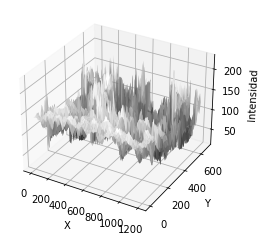

In [17]:
imagen = "tulipanes.jpg"
grayscale = np.mean(plt.imread(imagen), axis=2)
tres_dimensiones(grayscale)

Problema 2. Implemente una función para cada una de las transformaciones vistas en clase: negativa, lineal, logarítmica y exponencial.

In [23]:
imagen = "jirafa.jpg"
image = plt.imread(imagen)[:, :, 0]

In [18]:
def negativa(image):
    negative_image = 255 - image
    return negative_image

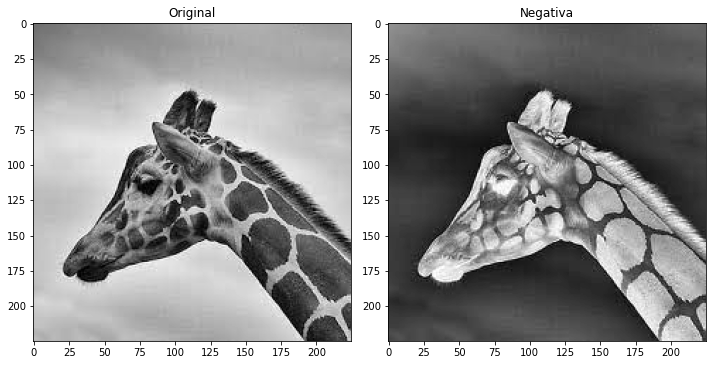

In [26]:
ima_negativa = negativa(image)
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original")

plt.subplot(1, 2, 2)
plt.imshow(ima_negativa, cmap='gray')
plt.title("Negativa")

plt.tight_layout()
plt.show()

In [19]:
def lineal(image, a, b):
    linear_image = np.clip(a * image + b, 0, 255).astype(np.uint8)
    return linear_image

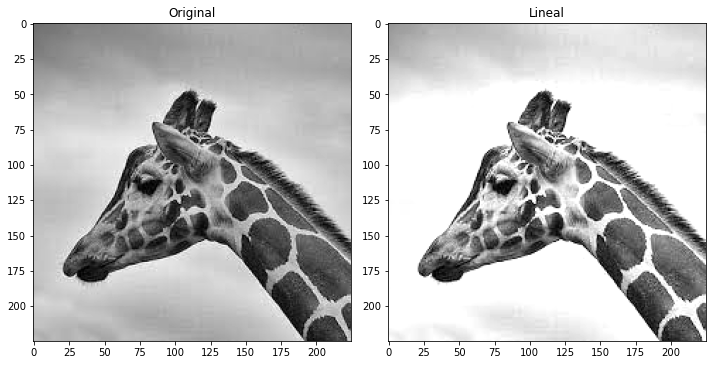

In [27]:
ima_lineal = lineal(image,1.2,30)
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original")

plt.subplot(1, 2, 2)
plt.imshow(ima_lineal, cmap='gray')
plt.title("Lineal")

plt.tight_layout()
plt.show()

In [20]:
def logaritmica(image, c):
    logarithmic_image = c * np.log1p(image)
    logarithmic_image = (255 * logarithmic_image / np.max(logarithmic_image)).astype(np.uint8)
    return logarithmic_image

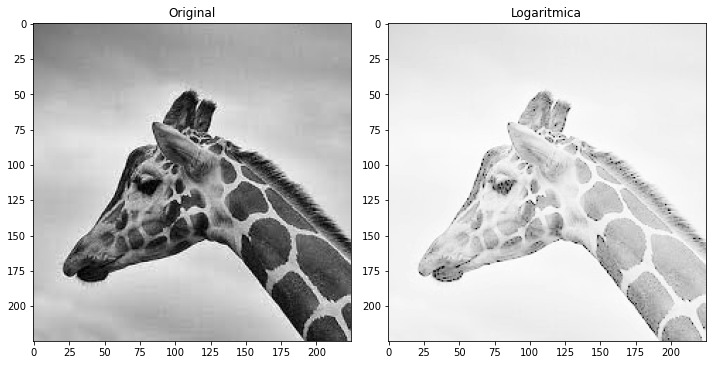

In [31]:
ima_logaritmica = logaritmica(image,40)
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original")

plt.subplot(1, 2, 2)
plt.imshow(ima_logaritmica, cmap='gray')
plt.title("Logaritmica")

plt.tight_layout()
plt.show()

In [21]:
def exponencial(image, gamma):
    exponential_image = np.power(image / 255.0, gamma) * 255
    exponential_image = exponential_image.astype(np.uint8)
    return exponential_image

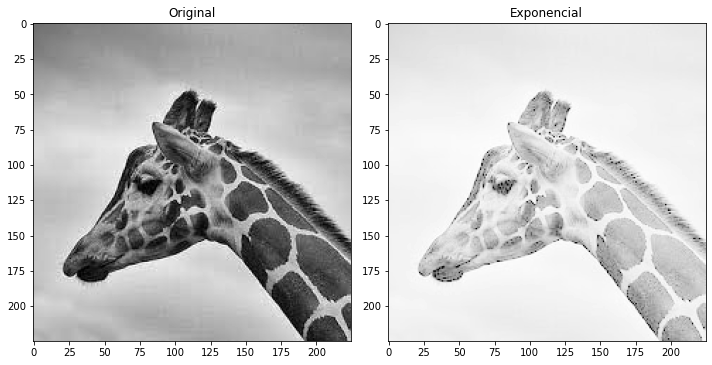

In [32]:
ima_exponencial = logaritmica(image,40)
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original")

plt.subplot(1, 2, 2)
plt.imshow(ima_exponencial, cmap='gray')
plt.title("Exponencial")

plt.tight_layout()
plt.show()

Problema 3. Desarrolle una función que dada dos imágenes a color, realice las operaciones SUMA, RESTA, AND, OR , XOR con ambas imágenes recuerde que para realizar las operaciones lógicas es necesario pasar la imagen a escala de grises y luego binarizarla.

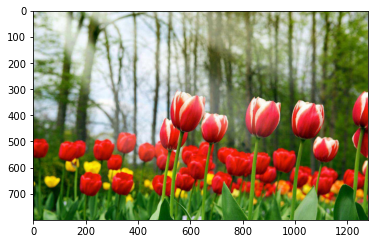

In [53]:
image1=cv2.imread("tulipanes2.jpg")
image1=cv2.cvtColor(image1,cv2.COLOR_BGR2RGB)
plt.imshow(image1)
plt.show()

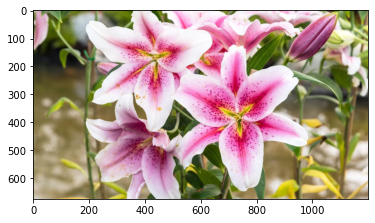

In [54]:
image2=cv2.imread("lirios.jpg")
image2=cv2.cvtColor(image2,cv2.COLOR_BGR2RGB)
plt.imshow(image2)
plt.show()

In [47]:
def escale_gray(image):
    return np.dot(image[..., :3], [0.2989, 0.5870, 0.1140])

In [ ]:
def rgb_to_gray(image):
    return np.dot(image[..., :3], [0.2989, 0.5870, 0.1140])

def binarize(image, threshold):
    return (image > threshold).astype(np.uint8)

def image_operations(image1, image2):
    gray_image1 = rgb_to_gray(image1)
    gray_image2 = rgb_to_gray(image2)

    binarized_image1 = binarize(gray_image1, 128)
    binarized_image2 = binarize(gray_image2, 128)

In [48]:
def binarizar(image, threshold):
    return (image > threshold).astype(np.uint8)

In [73]:
def operaciones(image1, image2):
    # escala a grises
    gray_image1 = escale_gray(image1)
    gray_image2 = escale_gray(image2)

    # imagenes del mismo tamaño
    min_height = min(gray_image1.shape[0], gray_image2.shape[0])
    min_width = min(gray_image1.shape[1], gray_image2.shape[1])

    gray_image1 = gray_image1[:min_height, :min_width]
    gray_image2 = gray_image2[:min_height, :min_width]

    # binarizar las imagenes
    binarizar_image1 = binarizar(gray_image1, 128)
    binarizar_image2 = binarizar(gray_image2, 128)

    suma = binarizar_image1 + binarizar_image2
    resta = np.abs(binarizar_image1 - binarizar_image2)
    and_ = np.logical_and(binarizar_image1, binarizar_image2).astype(np.uint8)
    or_ = np.logical_or(binarizar_image1, binarizar_image2).astype(np.uint8)
    xor = np.logical_xor(binarizar_image1, binarizar_image2).astype(np.uint8)

    return suma, resta, and_, or_, xor

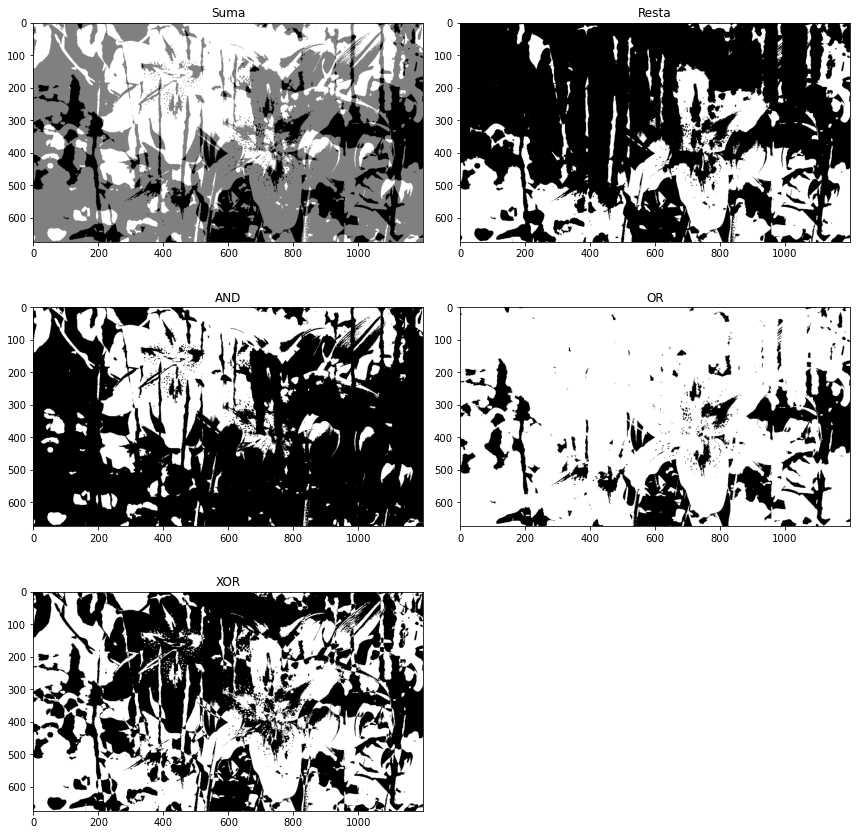

In [78]:
suma, resta, and_, or_, xor = operaciones(image1, image2)

plt.figure(figsize=(12, 12))

plt.subplot(3, 2, 1)
plt.imshow(suma, cmap='gray')
plt.title("Suma")

plt.subplot(3, 2, 2)
plt.imshow(resta, cmap='gray')
plt.title("Resta")

plt.subplot(3, 2, 3)
plt.imshow(and_, cmap='gray')
plt.title("AND")

plt.subplot(3, 2, 4)
plt.imshow(or_, cmap='gray')
plt.title("OR")

plt.subplot(3, 2, 5)
plt.imshow(xor, cmap='gray')
plt.title("XOR")

plt.tight_layout()
plt.show()

Problema 4. Realice una comparación entre el algoritmo de Canny, el operador de Sobel y el operador Laplaciano para encontrar los bordes en una imagen, para este ejercicio puede utilizar las funciones de openCV y cualquier imagen, como entregable debe mostrar una comparación entre los tres enfoques con
una tabla donde se muestre las ventajas y desventajas de cada enfoque

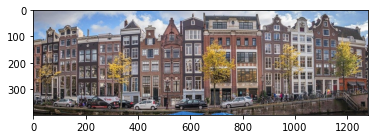

In [80]:
img_algotimo=cv2.imread("imagen5.jpg")
img_algotimo=cv2.cvtColor(img_algotimo,cv2.COLOR_BGR2RGB)
plt.imshow(img_algotimo)
plt.show()

In [83]:
# Algoritmo de Canny
canny = cv2.Canny(img_algotimo, threshold1=100, threshold2=200)

In [81]:
# Operador de Sobel
sobel_x = cv2.Sobel(img_algotimo, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(img_algotimo, cv2.CV_64F, 0, 1, ksize=3)
sobel = np.sqrt(sobel_x**2 + sobel_y**2).astype(np.uint8)

In [82]:
# Operador Lapraciano
laplacian = cv2.Laplacian(img_algotimo, cv2.CV_64F)
laplacian = np.abs(laplacian).astype(np.uint8)

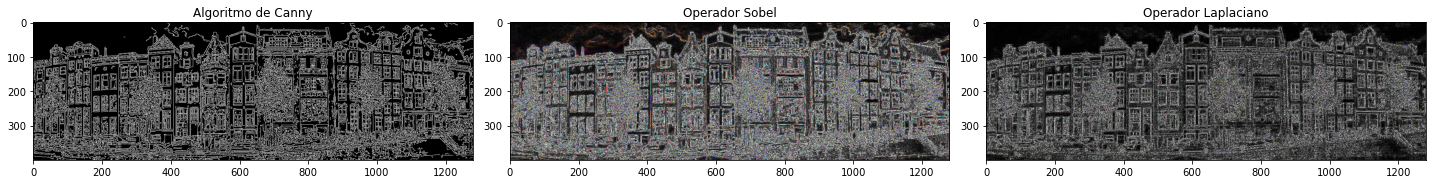


| Enfoque           | Ventajas                             | Desventajas                          |
|-------------------|-------------------------------------|--------------------------------------|
| Operador Sobel    | Detecta bordes en diferentes direcciones | Sensible al ruido                    |
| Operador Laplaciano | Detecta bordes con detalles finos      | Amplifica el ruido                   |
| Algoritmo de Canny | Precisión, bajo ruido, bordes continuos | Parámetros críticos, proceso más lento |



In [87]:
plt.figure(figsize=(20, 15))

plt.subplot(2, 3, 1)
plt.imshow(canny, cmap='gray')
plt.title("Algoritmo de Canny")

plt.subplot(2, 3, 2)
plt.imshow(sobel, cmap='gray')
plt.title("Operador Sobel")

plt.subplot(2, 3, 3)
plt.imshow(laplacian, cmap='gray')
plt.title("Operador Laplaciano")

plt.tight_layout()
plt.show()

tabla = """
| Enfoque           | Ventajas                             | Desventajas                          |
|-------------------|-------------------------------------|--------------------------------------|
| Operador Sobel    | Detecta bordes en diferentes direcciones | Sensible al ruido                    |
| Operador Laplaciano | Detecta bordes con detalles finos      | Amplifica el ruido                   |
| Algoritmo de Canny | Precisión, bajo ruido, bordes continuos | Parámetros críticos, proceso más lento |
"""

print(tabla)

Problema 5. Utilizando funciones de OpenCV deberá aplicar los filtros de convolución de tamaño de kernel (3x3, 5x5 y 7x7) las operaciones que deberá realizar son las siguientes:
-   Kernel Gaussiano de riodo.
-   Kernel Box de ruido.
-   Kernel de mediana para ruido.
-   Kernel Sobel para detección de bornes (en X e Y).
-   Kernel Lapaciano para detección de bordes.
-   Kernel de realce (Sharpening).
-   Kernel de relieve (Embossing)

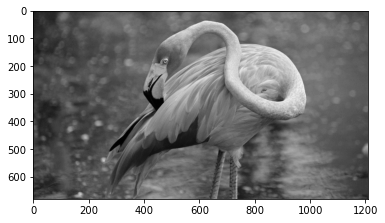

In [98]:
im_opencv = "imagen7.jpg"
image = cv2.imread(im_opencv, cv2.IMREAD_GRAYSCALE) #en escala de grises
plt.imshow(image, cmap="gray") #gray para que no se vea mal la imagen porque solo tiene un canal

In [99]:
# Definir los diferentes kernels
kernel_sizes = [3, 5, 7]

# Kernel Gaussiano
gaussian_kernels = [cv2.getGaussianKernel(ksize, -1) @ cv2.getGaussianKernel(ksize, -1).T for ksize in kernel_sizes]

# Kernel Box de ruido
box_kernels = [np.ones((ksize, ksize), dtype=np.float32) / (ksize * ksize) for ksize in kernel_sizes]

# Kernel de mediana para ruido
median_kernels = [np.ones((ksize, ksize), dtype=np.float32) for ksize in kernel_sizes]

# Kernel Sobel para detección de bordes en X e Y
sobel_kernels = [cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=ksize) for ksize in kernel_sizes]

# Kernel Laplaciano para detección de bordes
laplacian_kernels = [cv2.Laplacian(image, cv2.CV_64F, ksize=ksize) for ksize in kernel_sizes]

# Kernel de realce (Sharpening)
sharpening_kernels = [np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]], dtype=np.float32) for _ in kernel_sizes]

# Kernel de relieve (Embossing)
embossing_kernels = [np.array([[-2, -1, 0], [-1, 1, 1], [0, 1, 2]], dtype=np.float32) for _ in kernel_sizes]

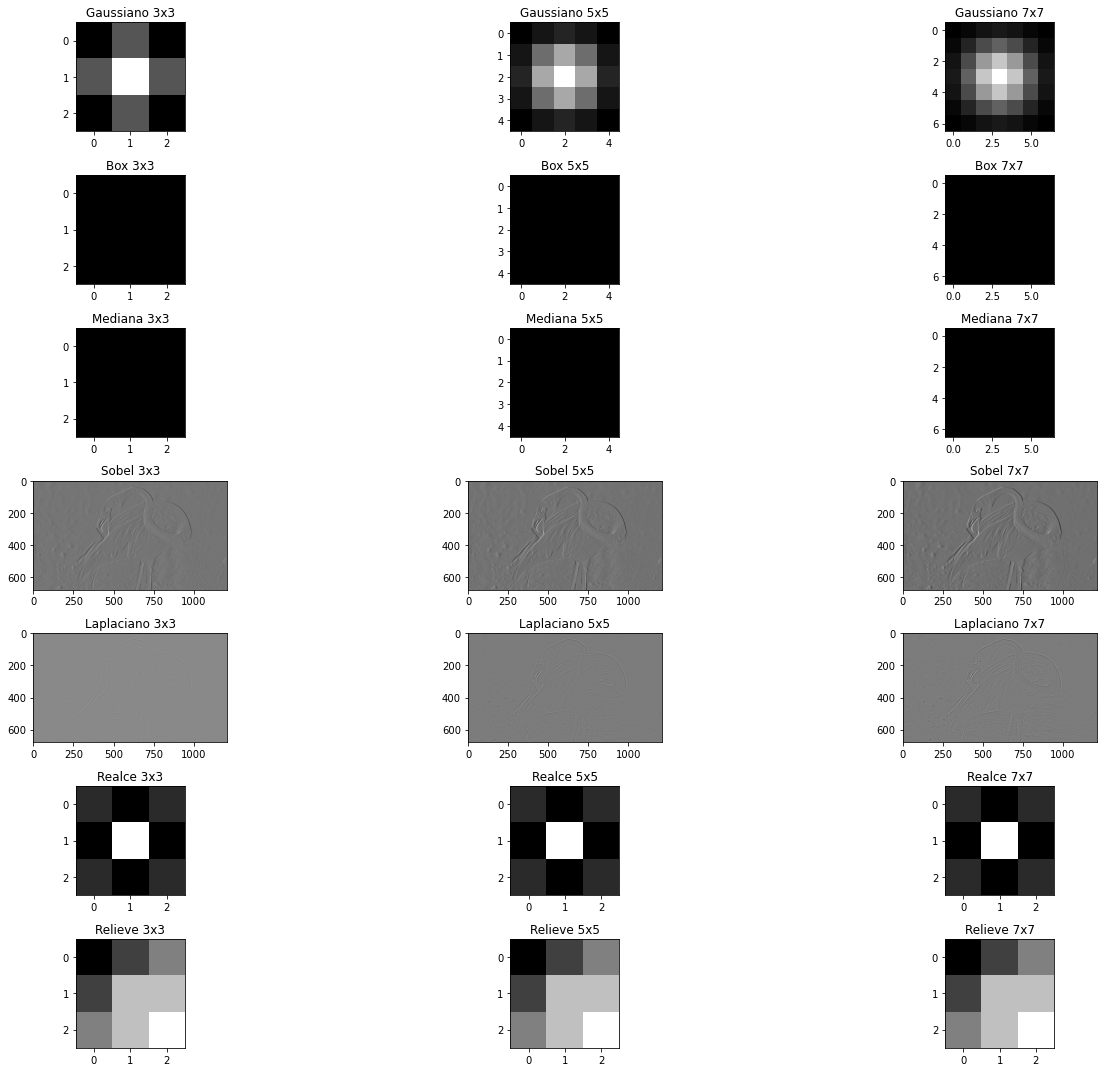

In [100]:
plt.figure(figsize=(20, 15))

for i, ksize in enumerate(kernel_sizes):
    plt.subplot(7, len(kernel_sizes), i + 1)
    plt.imshow(gaussian_kernels[i], cmap='gray')
    plt.title(f"Gaussiano {ksize}x{ksize}")
    
    plt.subplot(7, len(kernel_sizes), i + 1 + len(kernel_sizes))
    plt.imshow(box_kernels[i], cmap='gray')
    plt.title(f"Box {ksize}x{ksize}")
    
    plt.subplot(7, len(kernel_sizes), i + 1 + 2 * len(kernel_sizes))
    plt.imshow(median_kernels[i], cmap='gray')
    plt.title(f"Mediana {ksize}x{ksize}")
    
    plt.subplot(7, len(kernel_sizes), i + 1 + 3 * len(kernel_sizes))
    plt.imshow(sobel_kernels[i], cmap='gray')
    plt.title(f"Sobel {ksize}x{ksize}")
    
    plt.subplot(7, len(kernel_sizes), i + 1 + 4 * len(kernel_sizes))
    plt.imshow(laplacian_kernels[i], cmap='gray')
    plt.title(f"Laplaciano {ksize}x{ksize}")
    
    plt.subplot(7, len(kernel_sizes), i + 1 + 5 * len(kernel_sizes))
    plt.imshow(sharpening_kernels[i], cmap='gray')
    plt.title(f"Realce {ksize}x{ksize}")
    
    plt.subplot(7, len(kernel_sizes), i + 1 + 6 * len(kernel_sizes))
    plt.imshow(embossing_kernels[i], cmap='gray')
    plt.title(f"Relieve {ksize}x{ksize}")

plt.tight_layout()
plt.show()